In [2]:
import numpy as np
import os

import torch

In [4]:
n_array = np.array([[1,2,3], [4,5,6]])
n_array.shape

(2, 3)

In [7]:
t_tensor = torch.from_numpy(n_array)
t_tensor.shape

torch.Size([2, 3])

In [8]:
torch.randn(3,2)

tensor([[-0.0906, -1.0880],
        [-1.6385, -0.4225],
        [-1.7273,  1.6408]])

In [21]:
t_16 = t_tensor.half()
t_32 = t_tensor.to(torch.float32)

In [23]:
torch.randn_like(t_32)

tensor([[-0.3263, -1.5166, -0.6991],
        [-1.1341,  0.9977, -1.4442]])

In [ ]:
torch.randn(100,100).element_size()

4

In [25]:
torch.randn(100,100, dtype=torch.float16).element_size()

2

In [27]:
x = torch.randn(32,10,512)
x.shape

torch.Size([32, 10, 512])

In [29]:
x.transpose(1,2).shape

torch.Size([32, 512, 10])

In [30]:
x.permute(0,2,1).shape

torch.Size([32, 512, 10])

In [39]:
x = torch.randn(10,10)
x.shape

torch.Size([10, 10])

In [40]:
# 차원을 늘린다..?
x.unsqueeze(0).shape

torch.Size([1, 10, 10])

In [42]:
x.unsqueeze(0).squeeze(2).shape

torch.Size([1, 10, 10])

In [55]:
# 1.(batch_size=8, seq_len=10, hidden_dim=512) 크기의 텐서를 만드세요.
# 2. 이것을 8개의 헤드로 나누기 위해 (8, 10, 8, 64) 크기로 view 해보세요. 
# 3. ($8 \times 64 = 512$)그다음 permute를 이용해 헤드 차원을 두 번째로 보내서 (8, 8, 10, 64) 크기로 만들어 보세요.
#   (이게 실제 Attention 연산을 수행하는 차원 순서입니다!)

# 1
batch_size = 8
seq_len = 10
hidden_dim = 512
x = torch.randn(batch_size, seq_len, hidden_dim)
print(x.shape)

# 2
x = x.view(8,10,8,64)
print(x.shape)

# 3
x = x.permute(0,2,1,3)
print(x.shape)


torch.Size([8, 10, 512])
torch.Size([8, 10, 8, 64])
torch.Size([8, 8, 10, 64])


In [73]:
# --- 단계 1: 학습 데이터 생성 ---
# 1. x_train: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]을 원소로 가지는 (6, 1) 모양의 실수 텐서
x_train = torch.arange(0,6, dtype=torch.float32)
print(x_train)
print(x_train.shape)
x_train = x_train.reshape(-1,1)
print(x_train)
print(x_train.shape)


# 2. y_train: 2 * x_train + 1 식을 사용하여 정답 생성
y_train = 2 * x_train + 1
print(y_train.shape)
print(y_train)

tensor([0., 1., 2., 3., 4., 5.])
torch.Size([6])
tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.]])
torch.Size([6, 1])
torch.Size([6, 1])
tensor([[ 1.],
        [ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.]])


In [ ]:
# --- 단계 2: 가중치(W)와 편향(b) 정의 ---
# 3. W: (1, 1) 크기의 난수 텐서 생성, 미분 가능하도록 설정
# 난수는 보통 뭘로 생성하지..? 표준정규분포? 정규분포?

W = torch.randn(1,1, requires_grad=True)
print(W.shape)
print(W)


# 4. b: 크기 1의 난수 텐서 생성, 미분 가능하도록 설정
# W는 [1,1]로 만들고, b는 1로 만드는 차이는 뭐지?
b = torch.randn(1, requires_grad=True)
print(b.shape)
print(b)



torch.Size([1, 1])
tensor([[1.1475]], requires_grad=True)
torch.Size([1])
tensor([0.9782], requires_grad=True)


In [82]:
print(x_train * W)

print(x_train + W + b)

tensor([[0.0000],
        [1.1475],
        [2.2950],
        [3.4425],
        [4.5900],
        [5.7375]], grad_fn=<MulBackward0>)
tensor([[2.1257],
        [3.1257],
        [4.1257],
        [5.1257],
        [6.1257],
        [7.1257]], grad_fn=<AddBackward0>)


In [ ]:
# --- 단계 3: 예측값(y_pred) 계산 ---
# 5. y_pred: x_train과 W를 행렬 곱하고 b를 더한 결과
# Q. 여기서 행렬곱이라는건 *가 아니라 @ 인건가..? matmul인건가...??? +
y_pred = x_train @ W + b
y_pred

tensor([[0.9782],
        [2.1257],
        [3.2732],
        [4.4207],
        [5.5682],
        [6.7157]], grad_fn=<AddBackward0>)

In [89]:
# --- 단계 4: 손실(Loss) 계산 ---
# 6. loss: (y_pred - y_train)의 제곱의 평균 (MSE)
loss = torch.mean((y_pred - y_train)**2)

# 결과 확인
print(f"W: {W.item()}, b: {b.item()}")
print(f"Loss: {loss.item()}")

W: 1.1474955081939697, b: 0.9781799912452698
Loss: 6.75548791885376


In [ ]:
### 확장판
# 1. 데이터 생성 (10개 샘플, 3개 특성)
X_train = torch.randn(10, 3)
true_W = torch.tensor([[2.0], [-1.0], [5.0]])
true_b = 1.0
y_train = X_train @ true_W + true_b

# 2. 학습 파라미터 정의 (여기를 채워주세요)
W = torch.randn(3,1, requires_grad=True)
b = torch.randn(1, requires_grad = True)

print(true_W.shape)
print(W.shape)
print(b.shape)

# 3. 예측값 계산
y_pred = X_train.matmul(W) + b
# y_pred = X_train @ W + b
print(y_pred.shape)

# 4. 손실 계산 (평균 제곱 오차)
loss = torch.mean((y_train - y_pred)**2)
print(f"Initial Loss: {loss.item()}")

torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([1])
torch.Size([10, 1])
Initial Loss: 36.85595703125


In [67]:
x_train.unsqueeze(-1).shape

torch.Size([10, 1])

In [ ]:
X_batch = torch.randn(5,4)
print(X_batch.shape)

W = torch.randn(4,2, requires_grad = True)
print(W.shape)

# (5,2) 의 각 column 마다 하나씩 bias가 존재함. -> [1,2] 필요.
# + 하면 broadcasting으로 해서 각각 더해짐
b = torch.randn(1,2, requires_grad = True)

y_true = X_batch @ W
y_pred = X_batch @ W + b
print(y_pred.shape)


# (y_true - y_pred)**2 -> element-wise 원소별로 제곱이 됨.
torch.mean((y_true - y_pred)**2)
print(f"Loss: {loss.item()}")


torch.Size([5, 4])
torch.Size([4, 2])
torch.Size([5, 2])
Loss: 36.85595703125


In [126]:
# 1.
X_all = torch.randn(100,10)
y_all = torch.randn(100,3)

# 2.
W = torch.randn(10,3, requires_grad = True)
b = torch.randn(1,3, requires_grad=True)

# (100,10)을 20개씩 쪼갠다. -> 방법이 뭘까?
# 뒤에 (),10)이 아니라 100개를 20개씩 쪼개야 한다.

total_loss = 0
for i in range(0,100,20):
    X_batch = X_all[i:i+20]
    y_batch = y_all[i:i+20]
    X_batch_pred = X_batch @ W + b
    loss = torch.mean((X_batch_pred - y_batch)**2)
    total_loss += loss

total_loss /= 5
print(f"Loss: {loss.item()}")

Loss: 12.245920181274414


In [127]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# 1. 데이터 생성 (100개 샘플, 10개 특성)
X_all = torch.randn(100, 10)
y_all = torch.randn(100, 3)

# 2. 데이터로더 설정 (배치 크기 20)
dataset = TensorDataset(X_all, y_all)
loader = DataLoader(dataset, batch_size=20, shuffle=True)

# 3. 모델 정의 (Linear 레이어)
model = nn.Linear(10, 3)

# 4. 배치 동작 관찰 루프
for batch_idx, (X_batch, y_batch) in enumerate(loader):
    # 모델에 배치를 한꺼번에 집어넣습니다.
    output = model(X_batch)
    
    print(f"=== Batch {batch_idx} ===")
    print(f"입력 배치 크기: {X_batch.shape}")
    print(f"출력 배치 크기: {output.shape}")
    
    # 여기서 첫 번째 배치의 데이터만 확인하고 루프를 멈춥니다.
    if batch_idx == 0:
        break

=== Batch 0 ===
입력 배치 크기: torch.Size([20, 10])
출력 배치 크기: torch.Size([20, 3])


In [132]:
X_all = torch.randn(100, 5)
y_all = torch.randn(100, 2)

W = torch.randn(5, 2, requires_grad=True)
b = torch.randn(2, requires_grad=True)

lr = 0.01
batch_size = 20

for i in range(0, 100, batch_size):
    X_batch = X_all[i : i + batch_size]
    y_batch = y_all[i : i + batch_size]
    
    y_pred = X_batch @ W + b

    loss = torch.mean((y_pred - y_batch)**2)
    
    loss.backward()
    
    with torch.no_grad():
        W -= lr * W.grad
        b -= lr * b.grad

        W.grad.zero_()
        b.grad.zero_()

    print(f"Batch {i//batch_size + 1} 처리 완료 | Loss: {loss.item():.4f}")

# 최종 확인
print("\n최종 W의 기울기 상태:", W.grad) # 0이 출력되어야 함

Batch 1 처리 완료 | Loss: 6.9433
Batch 2 처리 완료 | Loss: 7.1314
Batch 3 처리 완료 | Loss: 3.3022
Batch 4 처리 완료 | Loss: 7.2029
Batch 5 처리 완료 | Loss: 2.3446

최종 W의 기울기 상태: tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])


In [136]:
class MyLinear:
    def __init__(self, in_features, out_features):
        self.W = torch.randn(in_features, out_features, requires_grad = True)
        self.b = torch.randn(1, out_features, requires_grad=True)

    def __call__(self, x):
        return self.forward(x)

    def forward(self,x):
        return x @ self.W + self.b    

In [138]:
model = MyLinear(5,2)
x_test = torch.randn(10,5)
y_pred = model(x_test)

print(f"Output shape: {y_pred.shape}")

Output shape: torch.Size([10, 2])


In [7]:
# sigmoid

def my_sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def my_sigmoid_np(x):
    return 1 / (1 + np.exp(-x))

x = torch.arange(0,5, dtype=torch.float32)

print(my_sigmoid(x))
print(my_sigmoid_np(x))

tensor([0.5000, 0.7311, 0.8808, 0.9526, 0.9820])
tensor([0.5000, 0.7311, 0.8808, 0.9526, 0.9820])


/var/folders/56/h6vkkmvd0zzcr59jvcgzr4y40000gn/T/ipykernel_8010/1964470458.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return 1 / (1 + np.exp(-x))


In [17]:
def my_relu(x):
    if x > 0:
        return x
    else:
        return 0

def my_relu(x):
    return torch.clamp(x, min=0.0)

def my_rele2(x):
    return x * (x > 0)


In [19]:
my_relu(x)
my_rele2(x)

tensor([[-0.0000, -0.0000, -0.0000],
        [0.1798, -0.0000, 0.2068],
        [-0.0000, 2.4122, 0.1762],
        [-0.0000, -0.0000, -0.0000],
        [0.2642, 1.0343, -0.0000],
        [-0.0000, -0.0000, -0.0000],
        [0.6120, -0.0000, 0.3605],
        [-0.0000, 0.4115, 0.0100],
        [0.0093, -0.0000, -0.0000],
        [0.3443, 1.8041, -0.0000]])

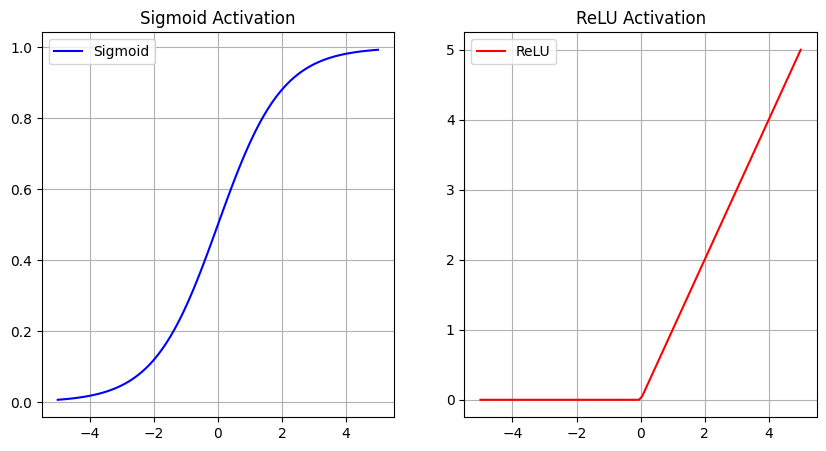

In [22]:
import matplotlib.pyplot as plt

x = torch.linspace(-5,5,100)

y_sigmoid = my_sigmoid(x)
y_relu = my_relu(x)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1) # 1행 2열 중 첫 번째
plt.plot(x.numpy(), y_sigmoid.numpy(), label='Sigmoid', color='blue')
plt.title('Sigmoid Activation')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2) # 1행 2열 중 두 번째
plt.plot(x.numpy(), y_relu.numpy(), label='ReLU', color='red')
plt.title('ReLU Activation')
plt.grid(True)
plt.legend()

plt.show()

None
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.,

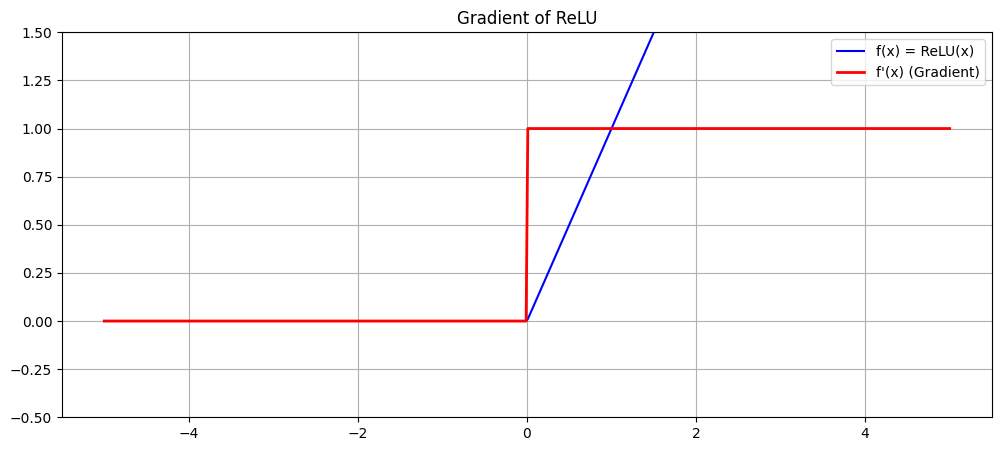

In [27]:
x = torch.linspace(-5, 5, 500, requires_grad=True)

def my_relu(x):
    return torch.clamp(x, min=0.0)

y = my_relu(x)

print(x.grad)
y.backward(torch.ones_like(x))
print(x.grad)
plt.figure(figsize=(12, 5))


plt.plot(x.detach().numpy(), y.detach().numpy(), label='f(x) = ReLU(x)', color='blue')
plt.title('ReLU Function')
plt.grid(True)
plt.legend()

plt.plot(x.detach().numpy(), x.grad.numpy(), label="f'(x) (Gradient)", color='red', linewidth=2)
plt.title('Gradient of ReLU')
plt.ylim(-0.5, 1.5)
plt.grid(True)
plt.legend()

plt.show()

In [ ]:
def my_mse_loss(y_pred, y_true):
    loss = torch.mean((y_pred - y_true)**2)
    return loss